## Logistic Regression: 

You are given a dataset named football.csv containing information about football players. Your task is to build a machine learning model to classify whether
a player’s contribution type is more inclined towards being type 1 or 0, where 1 indicates players with contributions in the attacking half of the football field and 0 indicates players with contributions in the defending half of the field. The classification column is “contribution type”.

1. Train a Logistic Regression model using the training data. Implement logistic regression
from scratch. You’re NOT ALLOWED to use sklearn for this question.
2. Make predictions on the test data using the trained model.
3. Calculate the F1 score, accuracy score, and confusion matrix to evaluate the model’s performance.

In [2]:
import pandas as pd
import numpy as np



In [3]:
df = pd.read_csv("football.csv")
df.head()

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
0,158023,L. Messi,93,93,78000000.0,320000.0,34,170,72,73.0,...,20,35,24,6,11,15,14,8,NaN,1
1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,21.0,...,35,42,19,15,6,12,8,10,NaN,1
2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,11.0,...,24,32,24,7,11,15,14,11,NaN,1
3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,175,68,73.0,...,35,32,29,9,9,15,15,11,NaN,1
4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,10.0,...,68,65,53,15,13,5,10,13,NaN,1


### Data Preprocessing

In [12]:
df.drop(axis = "columns", labels = ["goalkeeping_speed", "short_name", "value_eur", "wage_eur",
                                          "age", "height_cm", "weight_kg", "club_team_id", "club_name",
                                          "league_name", "league_level", "club_jersey_number", "nation_jersey_number",
                                          "preferred_foot", "weak_foot", "body_type", "release_clause_eur", "player_tags",
                                          "player_traits", "work_rate"], inplace = True)
df.drop(axis = "columns", labels = ["sofifa_id", "overall", "potential", "skill_moves", "international_reputation"], inplace = True)


impdata = df.fillna(df.median())

### Splitting the dataset and Training the model

In [13]:
from sklearn.model_selection import train_test_split

X = impdata.drop(columns=['contribution_type'])
y = impdata['contribution_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)

## Logistic Regression

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_train = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_train]
        return class_pred
    lr = LogisticRegression(lr = 0.01)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc = accuracy(y_pred, y_test)
print(f"Accuracy = {acc*100} %")

In [16]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def evaluate_model(y_true, y_pred):
    
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy Score: {accuracy:.2f}')

    f1 = f1_score(y_true, y_pred)
    print(f'F1 Score: {f1:.2f}')

    
    confusion = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix:')
    print(confusion)

y_pred = lr.predict(X_test)
evaluate_model(y_test, y_pred)

Accuracy Score: 0.83
F1 Score: 0.84
Confusion Matrix:
[[609 245]
 [ 19 682]]


[[609 245]
 [ 19 682]]


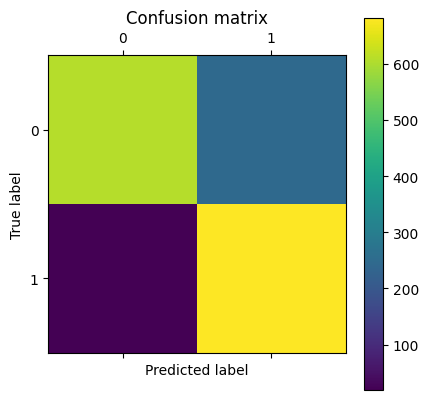

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

confusion_matrixx = confusion_matrix(y_test, y_pred)
print(confusion_matrixx)
plt.matshow(confusion_matrixx)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()